In [2]:
# k-nearest neighbours regression
import mglearn
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# simple usage
# loading dataset
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
# create regressor defining number of neighbours to consider
reg = KNeighborsRegressor(n_neighbors=3)

In [5]:
# fit regressor using the data
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [6]:
print("Predictions on test set:\n{}".format(reg.predict(X_test)))
print("Accuracy in the test set: {:.2f}".format(reg.score(X_test, y_test)))

Predictions on test set:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Accuracy in the test set: 0.83


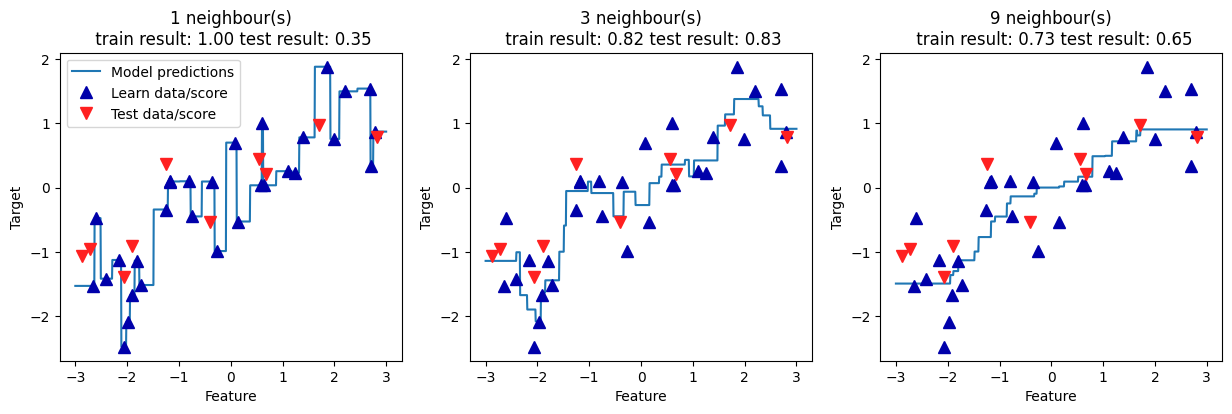

In [7]:
# visualise results for different numbers of neighbours 
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbour(s)\n train result: {:.2f} test result: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)
    ))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Learn data/score",
                "Test data/score"], loc="best")
plt.show()